 ## Fun with Hopfield and Numpy
 #http://codeaffectionate.blogspot.com/2013/05/fun-with-hopfield-and-numpy.html

Hopfield networks are fun to play with and are very easily implemented in Python using the Numpy library. Simple as they are, they are the basis of modern machine learning techniques such as Deep Learning and programming models for quantum computers such as Adiabatic quantum computation. 

 We are going to use a Hopfield network for optical character recognition. This is obviously a toy example and there are much more better machine learning techniques for this kind of problem (e.g. deep learning) but it is a nice demonstration.

Among other things Hopfield networks work as autoassociative memories, allowing to store and to recall patterns, e.g. images of letters. We want to store two letters and then try to recognize noisy versions of those letters. In the following we first create images of the letters "A" and "Z" from a string representation: 

In [19]:
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""

In [20]:
A

'\n.XXX.\nX...X\nXXXXX\nX...X\nX...X\n'

Hopfield networks operate on binary vectors and we therefore define a function to_pattern() that takes a letter image and transforms it into a bipolar vector by gluing all image rows together, and converting "X" to +1 and "." to -1. 

In [21]:
def to_pattern(letter):
    from numpy import array
    return array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

In [22]:
Atp=to_pattern(A)
Atp

array([-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1])

To visualize a pattern as an image we write a function display(pattern) that reshapes the pattern vector to a matrix and displays it as an image using the pylab function imshow(). 

In [23]:
def display(pattern):
    from pylab import imshow, cm, show
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

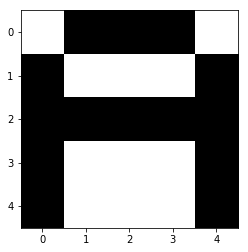

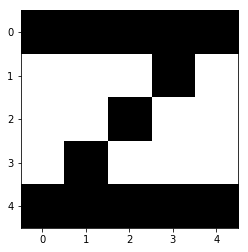

In [24]:
display(to_pattern(A)); display(to_pattern(Z))

 Having all the basic elements in place lets get serious. First thing to do is to create the Hopfield network from the given patterns. Training a Hopfield network is extremely simple and requires only computation of the outer products of all pattern vectors with each others and summation of the resulting matrices.
$$\text{W}=\sum_k^n\text{p}_k\text{p}_k^T$$

The resulting matrix $\text{W}$ specifies the weights of the edges between the nodes of the network and the nodes represent the features of the patterns (= pixels in an image). There are variants but typically the weight matrix is normalized (division by the number of patterns) and diagonal elements are set to zero (subtraction of the identity matrix I), which leads to the following expression:
$$\text{W}=\frac{1}{n}\sum_k^n\text{p}_k\text{p}_k^T−\text{I}$$

Let us organize all our patterns in a matrix (rows are patterns) 

In [25]:
from numpy import array
patterns = array([to_pattern(A), to_pattern(Z)])

and the implementation of the training formula is straight forward: 

In [26]:
def train(patterns):
    from numpy import zeros, outer, diag_indices 
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

 To recall a stored pattern from a Hopfield network the pattern itself (or a partial or nosy version of it) the dot product of the pattern vector and the weight matrix is computed. This produces a new pattern vector that is binarized and then fed back into the system:
$$\text{p}^{(t+1)}=sgn(\text{Wp}^{(t)})$$

The operation is repeated until the pattern vector becomes stable or after a specified number of iteration has been performed. We keep the implementation simple and stop after 5 steps, which is typically sufficient. 

In [27]:
def recall(W, patterns, iters=5):
    from numpy import vectorize, dot
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    for x in range(0, iters):        
        patterns = sgn(dot(patterns,W))
    return patterns

(Toto vyzera byt synchronny update, ked vsetky neurony su updatovane sucasne.)

 Note that in contrast to the recall formula the code performs the recall on all pattern within the pattern matrix at once, while the formula describes the recall for an individual pattern vector. Also the pattern matrix contains the patterns a rows and therefore the dot product W*p in the formula becomes dot(patterns,W) in the code (Since W is symmetric, transposing W is not required).

To test the network I created noisy version of the training patterns by randomly flipping 10 bits. The image sequence below shows the resulting input patterns and the output patterns after the second and third iteration. As you see the original patterns have been recalled perfectly after three iterations (from left to right). 

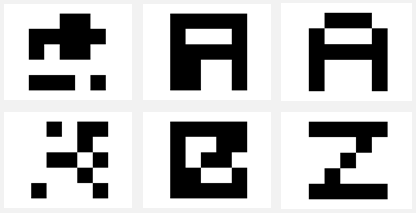

In [28]:
from IPython.display import Image
Image(filename='convergence.png')

 Patterns are stored as low energy states (attractors) within the system and the recall procedure describes the trajectory of an input pattern to its attractor. Each step reduces the energy and the energy for a pattern is defined as follows:
$$E(\text{p})=\text{pWp}^T$$

Here is the corresponding code to compute the energy for the pattern in the pattern matrix. 

In [29]:
def hopfield_energy(W, patterns):
    from numpy import array, dot
    return array([-0.5*dot(dot(p.T,W),p) for p in patterns])

A few final comments. The Hopfield network does not only store the original patterns but also their inverse versions and possibly linear combinations of patterns. Furthermore the capacity of the network is limited. For random patterns the network can store roughly 0.14*N pattern without errors (N = Number of network nodes). There are many variations of the Hopfield network with different training and recall procedures that give better performance but the beauty of the original Hopfield network is in its simple implementation but complex behavior. 

 ## The End

## My Test

In [30]:
A0 = """
..XX.
XXXXX
X.XX.
.....
XXX.X
"""
Z0 = """
.X.XX
...X.
.XX.X
...X.
X...X
"""

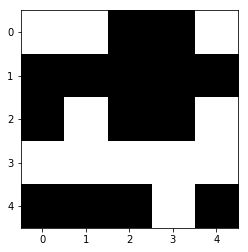

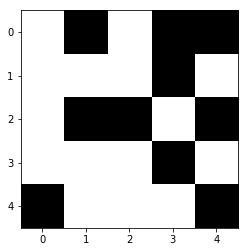

In [31]:
display(to_pattern(A0)); display(to_pattern(Z0))

In [32]:
patterns0 = array([to_pattern(A0), to_pattern(Z0)])

In [33]:
W = train(patterns)

In [34]:
W

array([[ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  1., -1., -1., -1.,  0.,
        -1., -1., -1.,  1.,  0.,  0., -1.,  0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  1., -1., -1., -1.,  0.,
        -1., -1., -1.,  1.,  0.,  0., -1.,  0.,  1.,  1.,  1.,  0.],
       [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  1.,  1.,  1.,  0.,
         1.,  1.,  1., -1.,  0.,  0.,  1.,  0., -1., -1., -1.,  0.],
       [ 0., -1., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  1.,  1.,  0., -1.,  0.,  0.,  0., -1.],
      

In [35]:
from numpy import transpose
pt = patterns.reshape((50,1))
tp = transpose(pt)
pt*tp
r,c=patterns.shape
for p in patterns:
    p

## The First Iteration

In [36]:
patterns1 = recall(W, patterns0, 1)

In [37]:
A1 = patterns1[:1]

In [38]:
Z1 = patterns1[1:2]

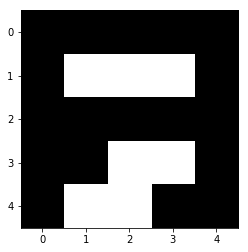

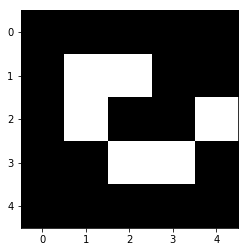

In [39]:
display(A1); display(Z1)

## The Second Iteration

In [40]:
patterns2 = recall(W, patterns0, 2)

In [41]:
A2 = patterns2[:1]

In [42]:
Z2 = patterns2[1:2]

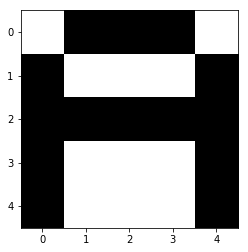

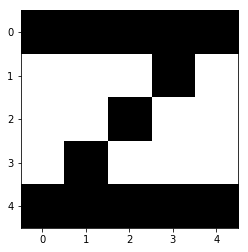

In [43]:
display(A2); display(Z2)

### OK, funguje to (9/6/2017)